In [6]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

import warnings
warnings.filterwarnings('ignore')


# Import Scikit-learn helper functions
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer, CountVectorizer

# Import Scikit-learn models
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import MultinomialNB

# Import Scikit-learn metric functions
from sklearn.metrics import confusion_matrix, classification_report
import seaborn as sns

In [3]:
from google.colab import drive

drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [4]:
data = pd.read_csv("/content/drive/MyDrive/time_series/OPTION2_joined_coursework_dataset_banking_final.csv", encoding= 'unicode_escape')
data

,text,label,query_index
0,Can I automatically top-up when traveling?,top_up_queries_or_issues,526cd7f17526
1,What kind of fiat currency can I used for hold...,other,f3cf7343067e
2,I did not get the item I ordered. How should ...,other,9a19501c3a3c
3,Freeze my account it's been hacked.,needs_troubleshooting,d76b07db8cf8
4,is there a reason that my payment didnt go thr...,other,bd95ba09a18d
...,...,...,...
14190,Can you tell me what the disposable cards are ...,card_queries_or_issues,bd6df98cc746
14191,The ATM won't give me my card back. I need it ...,card_queries_or_issues,e6197a1334b3
14192,Can you please tell me why my card payments ar...,card_queries_or_issues,b922a2a5f687
14193,The rate for a currency exchange was wrong whe...,needs_troubleshooting,cb1ed2c3ca95


In [5]:
data.dropna(inplace = True)

In [7]:
data.text

0               Can I automatically top-up when traveling?
1        What kind of fiat currency can I used for hold...
2        I did not get the item I ordered.  How should ...
3                      Freeze my account it's been hacked.
4        is there a reason that my payment didnt go thr...
                               ...                        
14190    Can you tell me what the disposable cards are ...
14191    The ATM won't give me my card back. I need it ...
14192    Can you please tell me why my card payments ar...
14193    The rate for a currency exchange was wrong whe...
14194    Am I able to track the card that was just sent...
Name: text, Length: 13674, dtype: object

In [8]:
data.label.nunique()

8

In [9]:
data.label.unique()

array(['top_up_queries_or_issues', 'other', 'needs_troubleshooting',
       'card_queries_or_issues', 'Needs_troubleshooting',
       'Card_queries_or_issues', 'Other', 'Top_up_queries_or_issues'],
      dtype=object)

In [10]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 13674 entries, 0 to 14194
Data columns (total 3 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   text         13674 non-null  object
 1   label        13674 non-null  object
 2   query_index  13674 non-null  object
dtypes: object(3)
memory usage: 427.3+ KB


In [11]:
data = data.iloc[:, :-1]

In [12]:
data

,text,label
0,Can I automatically top-up when traveling?,top_up_queries_or_issues
1,What kind of fiat currency can I used for hold...,other
2,I did not get the item I ordered. How should ...,other
3,Freeze my account it's been hacked.,needs_troubleshooting
4,is there a reason that my payment didnt go thr...,other
...,...,...
14190,Can you tell me what the disposable cards are ...,card_queries_or_issues
14191,The ATM won't give me my card back. I need it ...,card_queries_or_issues
14192,Can you please tell me why my card payments ar...,card_queries_or_issues
14193,The rate for a currency exchange was wrong whe...,needs_troubleshooting


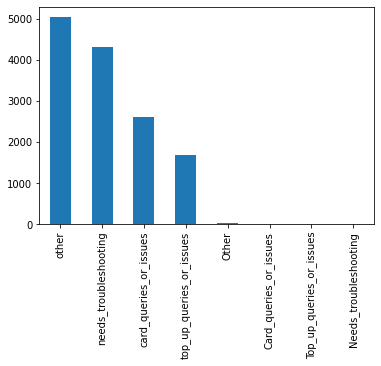

In [13]:
data.label.value_counts().plot(kind = "bar");

From the above, a slight look shows that the dataset is inbalanced but on a closer look we notice they exits
reppeated labels with entry errors example (other & 0ther,needs_troubleshooting & Needs_troubleshooting, top_up_queries_or_issues & Top_up_queries_or_issues, Card_queries_or_issues & Card_queries_or_issues )

- soluction:
the above noted values are to be merged with the original variable name

In [14]:
data.label.value_counts()

other                       5036
needs_troubleshooting       4305
card_queries_or_issues      2598
top_up_queries_or_issues    1684
Other                         21
Card_queries_or_issues        12
Top_up_queries_or_issues      11
Needs_troubleshooting          7
Name: label, dtype: int64

In [15]:
data.fillna("other", inplace = True)

In [16]:
data.label.replace("Card_queries_or_issues", "card_queries_or_issues", inplace = True)
data.label.replace("Top_up_queries_or_issues", "top_up_queries_or_issues", inplace = True)
data.label.replace("Needs_troubleshooting", "needs_troubleshooting", inplace = True)
data.label.replace("Other", "other", inplace = True)

In [17]:
data.label.value_counts()

other                       5057
needs_troubleshooting       4312
card_queries_or_issues      2610
top_up_queries_or_issues    1695
Name: label, dtype: int64

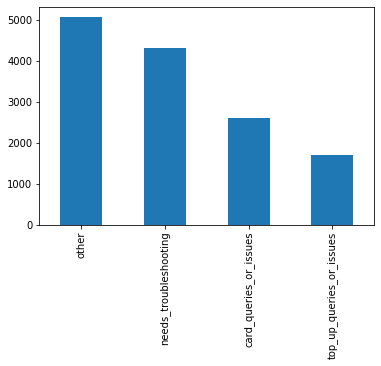

In [18]:
data.label.value_counts().plot(kind = "bar");

In [19]:
from nltk.tokenize import RegexpTokenizer # regexp tokenizers use to split words from text 
tokenizer = RegexpTokenizer(r'[A-Za-z]+')

In [20]:
import time
print('Getting words tokenized ...')
t0= time.perf_counter()
data['text_tokenized'] = data.text.map(lambda t: tokenizer.tokenize(t)) # doing with all rows
t1 = time.perf_counter() - t0
print('Time taken',t1 ,'sec')

Getting words tokenized ...
Time taken 0.05026734800000554 sec


In [21]:
data

,text,label,text_tokenized
0,Can I automatically top-up when traveling?,top_up_queries_or_issues,"[Can, I, automatically, top, up, when, traveling]"
1,What kind of fiat currency can I used for hold...,other,"[What, kind, of, fiat, currency, can, I, used,..."
2,I did not get the item I ordered. How should ...,other,"[I, did, not, get, the, item, I, ordered, How,..."
3,Freeze my account it's been hacked.,needs_troubleshooting,"[Freeze, my, account, it, s, been, hacked]"
4,is there a reason that my payment didnt go thr...,other,"[is, there, a, reason, that, my, payment, didn..."
...,...,...,...
14190,Can you tell me what the disposable cards are ...,card_queries_or_issues,"[Can, you, tell, me, what, the, disposable, ca..."
14191,The ATM won't give me my card back. I need it ...,card_queries_or_issues,"[The, ATM, won, t, give, me, my, card, back, I..."
14192,Can you please tell me why my card payments ar...,card_queries_or_issues,"[Can, you, please, tell, me, why, my, card, pa..."
14193,The rate for a currency exchange was wrong whe...,needs_troubleshooting,"[The, rate, for, a, currency, exchange, was, w..."


In [22]:
from nltk.stem.snowball import SnowballStemmer # stemmes words
stemmer = SnowballStemmer("english") # choose a language


data['text_stemmed'] = data['text_tokenized'].map(lambda l: [stemmer.stem(word) for word in l])

data['text_processed'] = data['text_stemmed'].map(lambda l: ' '.join(l))

In [23]:
data

,text,label,text_tokenized,text_stemmed,text_processed
0,Can I automatically top-up when traveling?,top_up_queries_or_issues,"[Can, I, automatically, top, up, when, traveling]","[can, i, automat, top, up, when, travel]",can i automat top up when travel
1,What kind of fiat currency can I used for hold...,other,"[What, kind, of, fiat, currency, can, I, used,...","[what, kind, of, fiat, currenc, can, i, use, f...",what kind of fiat currenc can i use for hold a...
2,I did not get the item I ordered. How should ...,other,"[I, did, not, get, the, item, I, ordered, How,...","[i, did, not, get, the, item, i, order, how, s...",i did not get the item i order how should i go...
3,Freeze my account it's been hacked.,needs_troubleshooting,"[Freeze, my, account, it, s, been, hacked]","[freez, my, account, it, s, been, hack]",freez my account it s been hack
4,is there a reason that my payment didnt go thr...,other,"[is, there, a, reason, that, my, payment, didn...","[is, there, a, reason, that, my, payment, didn...",is there a reason that my payment didnt go thr...
...,...,...,...,...,...
14190,Can you tell me what the disposable cards are ...,card_queries_or_issues,"[Can, you, tell, me, what, the, disposable, ca...","[can, you, tell, me, what, the, dispos, card, ...",can you tell me what the dispos card are use for
14191,The ATM won't give me my card back. I need it ...,card_queries_or_issues,"[The, ATM, won, t, give, me, my, card, back, I...","[the, atm, won, t, give, me, my, card, back, i...",the atm won t give me my card back i need it b...
14192,Can you please tell me why my card payments ar...,card_queries_or_issues,"[Can, you, please, tell, me, why, my, card, pa...","[can, you, pleas, tell, me, whi, my, card, pay...",can you pleas tell me whi my card payment are ...
14193,The rate for a currency exchange was wrong whe...,needs_troubleshooting,"[The, rate, for, a, currency, exchange, was, w...","[the, rate, for, a, currenc, exchang, was, wro...",the rate for a currenc exchang was wrong when ...


In [24]:
top_up_queries_or_issues = data.query("label == 'top_up_queries_or_issues'")
other = data.query("label == 'other'")
needs_troubleshooting = data.query("label == 'needs_troubleshooting'")
card_queries_or_issues = data.query("label == 'card_queries_or_issues'")

In [25]:
top_up_queries_or_issues.shape, other.shape,needs_troubleshooting.shape, card_queries_or_issues.shape

((1695, 5), (5057, 5), (4312, 5), (2610, 5))

In [26]:
top_up_queries_or_issues

,text,label,text_tokenized,text_stemmed,text_processed
0,Can I automatically top-up when traveling?,top_up_queries_or_issues,"[Can, I, automatically, top, up, when, traveling]","[can, i, automat, top, up, when, travel]",can i automat top up when travel
32,top up by my card is that possible?,top_up_queries_or_issues,"[top, up, by, my, card, is, that, possible]","[top, up, by, my, card, is, that, possibl]",top up by my card is that possibl
42,can i top up with check?,top_up_queries_or_issues,"[can, i, top, up, with, check]","[can, i, top, up, with, check]",can i top up with check
46,Will I be charged for a top off transfer?,top_up_queries_or_issues,"[Will, I, be, charged, for, a, top, off, trans...","[will, i, be, charg, for, a, top, off, transfer]",will i be charg for a top off transfer
56,I was checking my statement and my top-up has ...,top_up_queries_or_issues,"[I, was, checking, my, statement, and, my, top...","[i, was, check, my, statement, and, my, top, u...",i was check my statement and my top up has bee...
...,...,...,...,...,...
14161,Is there a problem with the top up system? My ...,top_up_queries_or_issues,"[Is, there, a, problem, with, the, top, up, sy...","[is, there, a, problem, with, the, top, up, sy...",is there a problem with the top up system my t...
14164,I was under the impression that you offer cryp...,top_up_queries_or_issues,"[I, was, under, the, impression, that, you, of...","[i, was, under, the, impress, that, you, offer...",i was under the impress that you offer crypto ...
14172,Can you top-up a card with a cheque?,top_up_queries_or_issues,"[Can, you, top, up, a, card, with, a, cheque]","[can, you, top, up, a, card, with, a, chequ]",can you top up a card with a chequ
14180,How do my friends top up my account,top_up_queries_or_issues,"[How, do, my, friends, top, up, my, account]","[how, do, my, friend, top, up, my, account]",how do my friend top up my account


In [27]:
from wordcloud import WordCloud, STOPWORDS
def visuals(label_text):
    comment_words = ''
    stopwords = set(STOPWORDS)

        # iterate through the text_sent keywords
    for val in data.text_processed:
        # typecaste each val to string
        val = str(val)

        # split the value
        tokens = val.split()

        # Converts each token into lowercase
        for i in range(len(tokens)):
            tokens[i] = tokens[i].lower()

        comment_words += " ".join(tokens)+" "
    
    wordcloud = WordCloud(width = 800, height = 800, background_color ='white', stopwords = stopwords, min_font_size = 10).generate(comment_words)

    # plot the WordCloud image
    plt.figure(figsize = (8, 8), facecolor = None)
    plt.imshow(wordcloud, interpolation='bilinear')
    plt.axis("off")
    plt.tight_layout(pad = 0)
    plt.show()

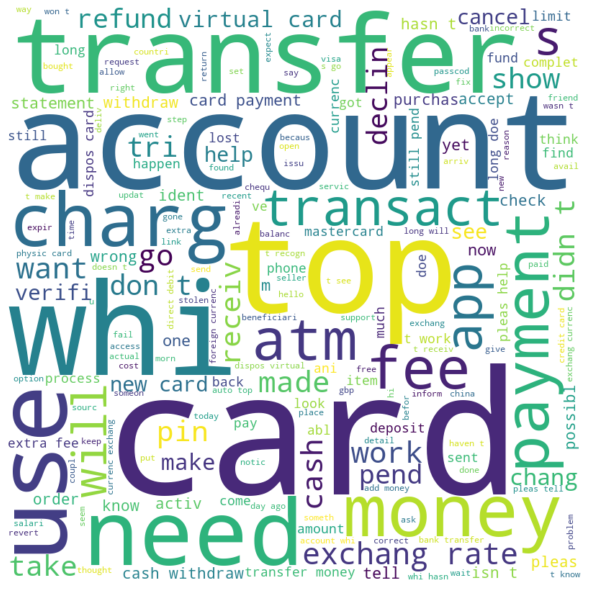

In [28]:
visuals(top_up_queries_or_issues.text_processed)

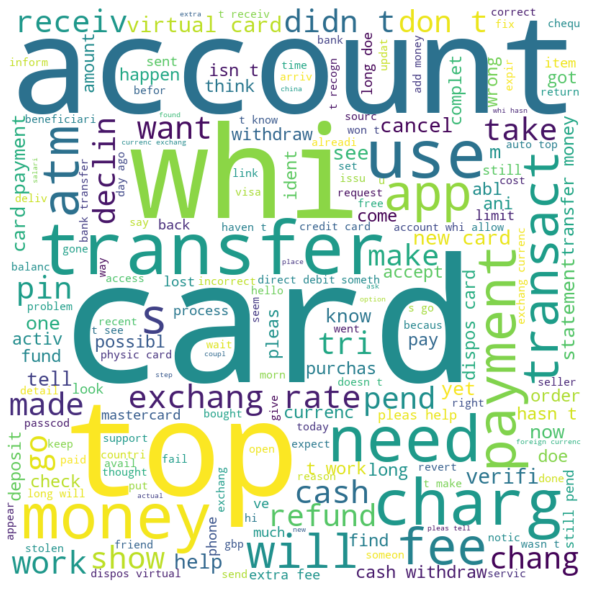

In [29]:
visuals(other.text_processed)

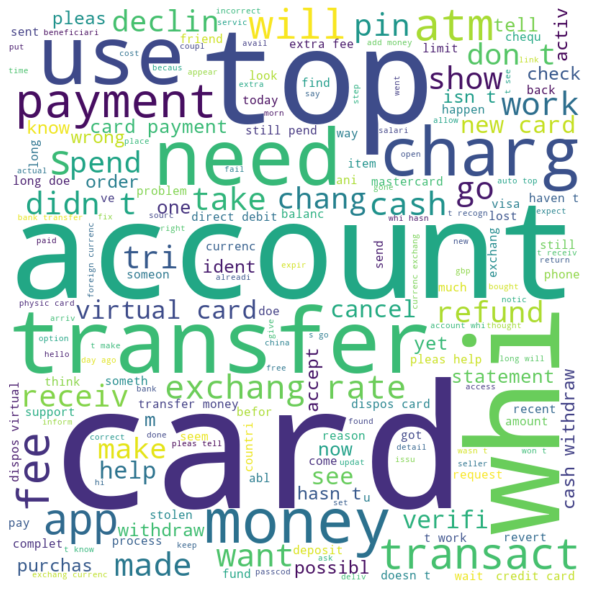

In [30]:
visuals(needs_troubleshooting.text_processed)

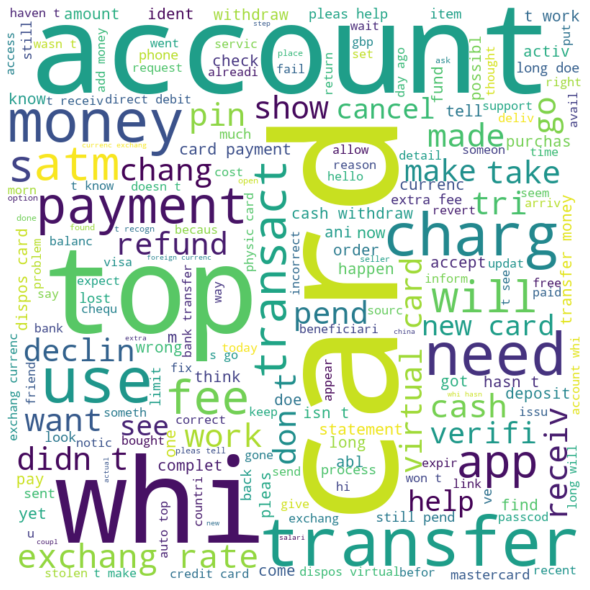

In [31]:
visuals(card_queries_or_issues.text_processed)

In [32]:
# create count_vectorizer and "TFIDF_term friquency inverse document frequency vectorizer" object
cv = CountVectorizer()
tdif = TfidfVectorizer()
# help(CountVectorizer())
feature = tdif.fit_transform(data.text_processed) #

In [33]:
#confirming if our text has been vectorised
feature[10:15].toarray() 

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

In [34]:
#import imblearn to balance the classes
import imblearn
from imblearn.over_sampling import SMOTE
from numpy import where
from collections import Counter
X = feature
y = data['label']
counter = Counter(y)
print("##---THE UNSAMPLED DATASET----##\n\n")
print(counter)

from imblearn import under_sampling, over_sampling
from imblearn.over_sampling import SMOTE
oversample = SMOTE()
X,y = oversample.fit_resample(X,y.astype(str))
counter = Counter(y)
print("\n\n##---THE SAMPLED DATASET----##\n\n")
print(counter)

##---THE UNSAMPLED DATASET----##


Counter({'other': 5057, 'needs_troubleshooting': 4312, 'card_queries_or_issues': 2610, 'top_up_queries_or_issues': 1695})


##---THE SAMPLED DATASET----##


Counter({'top_up_queries_or_issues': 5057, 'other': 5057, 'needs_troubleshooting': 5057, 'card_queries_or_issues': 5057})


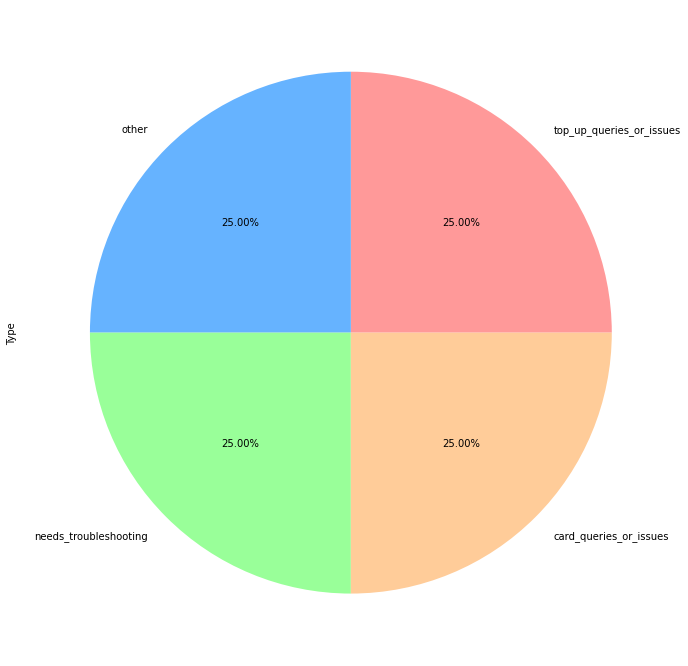

In [35]:
colors = ['#ff9999','#66b3ff','#99ff99','#ffcc99']
y.value_counts().plot(kind = "pie",figsize = (12,12),y = "url",
                                       label = "Type",
                                       autopct='%1.2f%%', colors = colors);

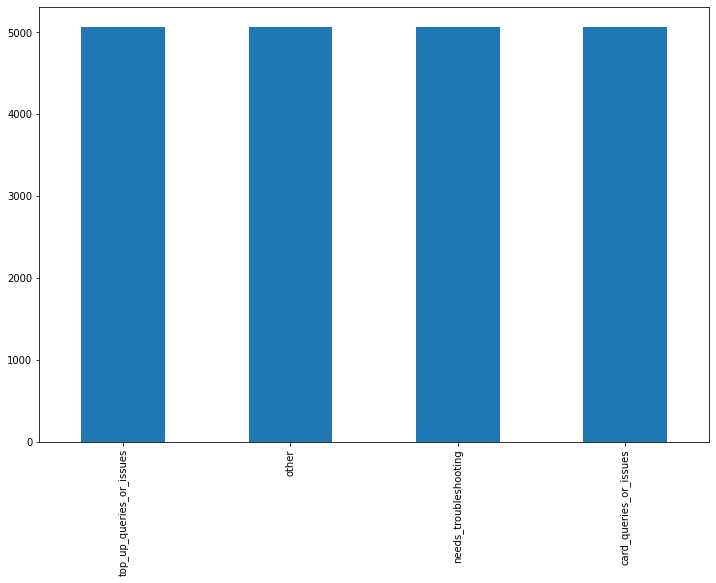

In [36]:
colors = ['#ff9999','#66b3ff','#99ff99','#ffcc99']
y.value_counts().plot(kind = "bar",figsize = (12,8),y = "url",
                                       label = "Type",);

In [37]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = .20, random_state = 42)

In [38]:
# Train the model
mnb = MultinomialNB()
mnb.fit(X_train, y_train)


# Test the mode (score, predictions, confusion matrix, classification report)
score_mnb = mnb.score(X_train, y_train)
predictions_mnb = mnb.predict(X_test)
cmatrix_mnb_tfidf = confusion_matrix(y_test, predictions_mnb)
creport_mnb_tfidf = classification_report(y_test, predictions_mnb)

print(score_mnb,"\n\n### Model Built ###\n")
print(classification_report(y_test, predictions_mnb))

0.8729452478062044 

### Model Built ###

                          precision    recall  f1-score   support

  card_queries_or_issues       0.89      0.85      0.87      1035
   needs_troubleshooting       0.77      0.87      0.82      1020
                   other       0.86      0.76      0.80      1030
top_up_queries_or_issues       0.91      0.94      0.92       961

                accuracy                           0.85      4046
               macro avg       0.85      0.85      0.85      4046
            weighted avg       0.85      0.85      0.85      4046



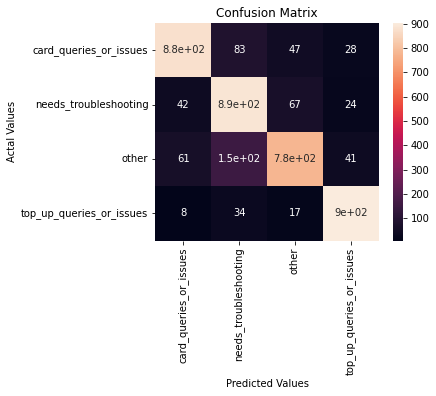

In [39]:
from sklearn import metrics
confusion_matrix = metrics.confusion_matrix(y_test, predictions_mnb)

cm_df = pd.DataFrame(confusion_matrix,
                     index = ['card_queries_or_issues','needs_troubleshooting','other','top_up_queries_or_issues'], 
                     columns = ['card_queries_or_issues','needs_troubleshooting','other','top_up_queries_or_issues'])


plt.figure(figsize=(5,4))
sns.heatmap(cm_df, annot = True)
plt.title('Confusion Matrix')
plt.ylabel('Actal Values')
plt.xlabel('Predicted Values')
plt.show()

In [44]:
# Importing required libraries for NN model
import nltk
from nltk.corpus import stopwords
from textblob import Word
import wordcloud
from sklearn.preprocessing import LabelEncoder
from collections import Counter
from sklearn.metrics import classification_report,confusion_matrix,accuracy_score
from keras.models import Sequential
from keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from keras.layers import Dense, Embedding, LSTM, SpatialDropout1D


#making a copy of the original dataset
data_v1 = data[['text','label']]

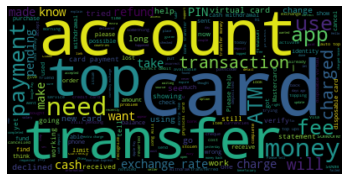

In [45]:
common_words=''
for i in data_v1.text:
    i = str(i)
    tokens = i.split()
    common_words += " ".join(tokens)+" "
wordcloud = wordcloud.WordCloud().generate(common_words)
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

In [46]:
# Encoded the target column
lb=LabelEncoder()
data_v1['label'] = lb.fit_transform(data_v1['label'])

In [47]:
tokenizer = Tokenizer(num_words=500, split=' ') 
tokenizer.fit_on_texts(data_v1['text'].values)
X = tokenizer.texts_to_sequences(data['text'].values)
X = pad_sequences(X)

In [48]:
model = Sequential()
model.add(Embedding(500, 120, input_length = X.shape[1]))
model.add(SpatialDropout1D(0.4))
model.add(LSTM(176, dropout=0.2, recurrent_dropout=0.2))
model.add(Dense(4,activation='softmax'))
model.compile(loss = 'categorical_crossentropy', optimizer='adam', metrics = ['accuracy'])
print(model.summary())

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding (Embedding)       (None, 63, 120)           60000     
                                                                 
 spatial_dropout1d (SpatialD  (None, 63, 120)          0         
 ropout1D)                                                       
                                                                 
 lstm (LSTM)                 (None, 176)               209088    
                                                                 
 dense (Dense)               (None, 4)                 708       
                                                                 
Total params: 269,796
Trainable params: 269,796
Non-trainable params: 0
_________________________________________________________________
None


In [49]:
#Splitting the data into training and testing
y=pd.get_dummies(data_v1['label'])
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size = 0.3, random_state = 42)

In [50]:
batch_size=32
epochs = 50
history = model.fit(X_train, y_train, epochs = epochs, batch_size=batch_size, verbose = 'auto', validation_data=(X_test, y_test))

Epoch 1/50
300/300 [==============================] - 111s 346ms/step - loss: 0.7606 - accuracy: 0.6957 - val_loss: 0.4329 - val_accuracy: 0.8467
Epoch 2/50
300/300 [==============================] - 94s 315ms/step - loss: 0.4170 - accuracy: 0.8462 - val_loss: 0.3765 - val_accuracy: 0.8672
Epoch 3/50
300/300 [==============================] - 93s 307ms/step - loss: 0.3541 - accuracy: 0.8702 - val_loss: 0.3390 - val_accuracy: 0.8725
Epoch 4/50
300/300 [==============================] - 94s 313ms/step - loss: 0.3295 - accuracy: 0.8765 - val_loss: 0.3407 - val_accuracy: 0.8725
Epoch 5/50
300/300 [==============================] - 96s 319ms/step - loss: 0.3047 - accuracy: 0.8886 - val_loss: 0.3254 - val_accuracy: 0.8857
Epoch 6/50
300/300 [==============================] - 93s 310ms/step - loss: 0.2921 - accuracy: 0.8920 - val_loss: 0.3267 - val_accuracy: 0.8864
Epoch 7/50
300/300 [==============================] - 93s 309ms/step - loss: 0.2682 - accuracy: 0.9014 - val_loss: 0.3230 - val_a

In [51]:
model.evaluate(X_test,y_test)

129/129 [==============================] - 3s 20ms/step - loss: 0.4626 - accuracy: 0.9081


[0.46258673071861267, 0.9081159830093384]

In [52]:
history_dict = history.history
print(history_dict.keys())

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])


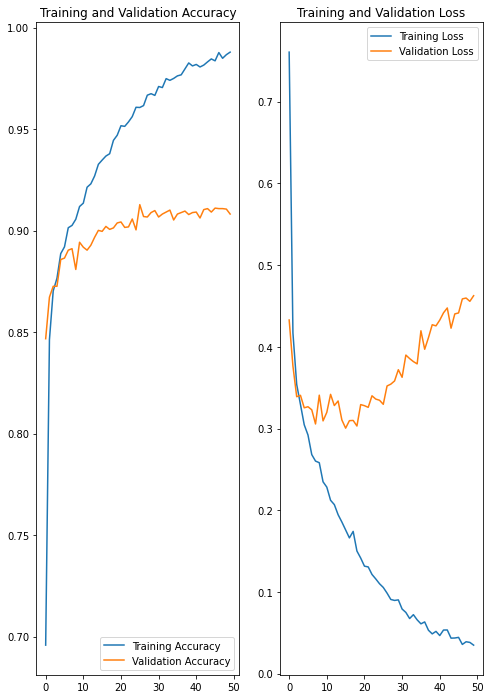

In [53]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

loss = history.history['loss']
val_loss = history.history['val_loss']

epochs_range = range(epochs)

plt.figure(figsize=(8, 12))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.savefig('./foo.png')
plt.show()